## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

# Display the data table for preview
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
df['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
## This seems like the hard way to do it but idc, I spent too much time on it already.
df_count = df.groupby(['Mouse ID']).agg({'Timepoint':'value_counts'})
df_count = df_count.rename(columns={'Timepoint':'Count_Timepoints'})
df_count = df_count.reset_index(level='Timepoint', drop = True)

dup_mouse = df_count.loc[df_count['Count_Timepoints'] > 1].index.unique()
dup_mouse = dup_mouse[0]
print(dup_mouse)

g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
df_count = df_count.reset_index()
df.loc[df['Mouse ID'] == dup_mouse, :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
df = df.loc[df['Mouse ID'] != dup_mouse, :]
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
df_group = df.groupby(['Drug Regimen'])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
regimen_mean = df_group['Tumor Volume (mm3)'].mean()
regimen_median = df_group['Tumor Volume (mm3)'].median()
regimen_var = df_group['Tumor Volume (mm3)'].var()
regimen_std = df_group['Tumor Volume (mm3)'].std()
regimen_sem = df_group['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary dataframe.
drug_regimen = pd.DataFrame({'Mean Tumor Volumn': regimen_mean, 'Median Tumor Volumn':regimen_median, 'Tumor Volumn':regimen_var, \
                            'Tumor Volumn STD':regimen_std, 'Tumor Volumn SEM':regimen_sem})

drug_regimen.head()

,Mean Tumor Volumn,Median Tumor Volumn,Tumor Volumn,Tumor Volumn STD,Tumor Volumn SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
df_summary = df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
df_summary.head()

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

## Bar and Pie Charts

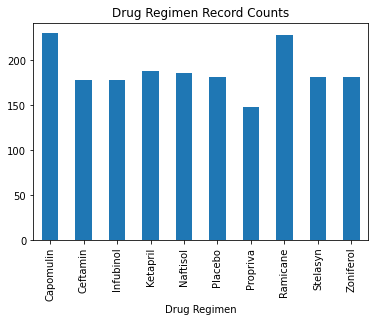

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
reg_count = df.groupby(['Drug Regimen']).count()

reg_count['Mouse ID'].plot(kind = 'bar', title = 'Drug Regimen Record Counts') #, ylabel = 'Record Count')

Text(0.5, 1.0, 'Drug Regimen Record Counts')

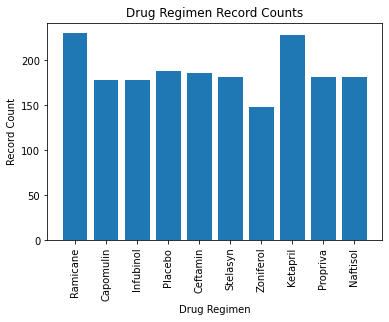

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

plt.bar(df['Drug Regimen'].unique(), reg_count['Mouse ID'], align="center")

plt.xticks(rotation='vertical')
plt.ylabel('Record Count')
plt.xlabel('Drug Regimen')
plt.title("Drug Regimen Record Counts")

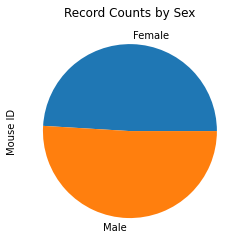

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = df.groupby(['Sex']).count()
gender_df['Mouse ID'].plot(kind = 'pie', title = 'Record Counts by Sex') #, ylabel = 'Record Count')

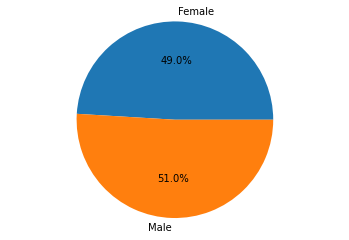

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(gender_df['Mouse ID'], labels=gender_df.index, autopct="%1.1f%%", shadow=False, startangle=0)
plt.axis("equal")

# Show the chart
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
#['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
## df = df.sort_values(by = ['Mouse ID', 'Timepoint'])
## df_last = df.groupby(['Mouse ID']).agg({'Timepoint':'last'}).reset_index()
df_last = df.groupby(['Mouse ID']).agg({'Timepoint':'max'}).reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
df_last = pd.merge(df, df_last, on = ['Mouse ID','Timepoint'], how = 'right')

# Get data for only the 4 asked for treatments.
df_last = df_last.loc[df_last['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
## df_last = df_last.loc[(df_last['Drug Regimen'] == 'Capomulin') | (df_last['Drug Regimen'] == 'Ramicane') | (df_last['Drug Regimen'] == 'Infubinol') | (df_last['Drug Regimen'] == 'Ceftamin')]

df_last

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
234,x822,Ceftamin,Male,3,29,45,61.386660,3
236,y163,Infubinol,Female,17,27,45,67.685569,3
240,y769,Ceftamin,Female,6,27,45,68.594745,4
241,y865,Ceftamin,Male,23,26,45,64.729837,3


In [27]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = df_last['Drug Regimen'].unique()

# Create list to fill with tumor vol data (for plotting)
tumor_vol = df_last['Tumor Volume (mm3)']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = df_last['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Determine outliers using the upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

outlier_occupancy = df_last.loc[(df_last['Tumor Volume (mm3)'] < lower_bound) | (df_last['Tumor Volume (mm3)'] > upper_bound)]

print(f'There are {len(outlier_occupancy)} outliers in our data set for Capomulin, Ramicane, Infubinol, and Ceftamin.')
print(f"The average tumor size for the 4 treatments of interest is {df_last['Tumor Volume (mm3)'].mean()} mm3.")
print(f'Upper Bound: {upper_bound} \t Lower Bound: {lower_bound}')

There are 0 outliers in our data set for Capomulin, Ramicane, Infubinol, and Ceftamin.
The average tumor size for the 4 treatments of interest is 47.19779518949999 mm3.
Upper Bound: 94.04403868375002 	 Lower Bound: 3.0739668737499812


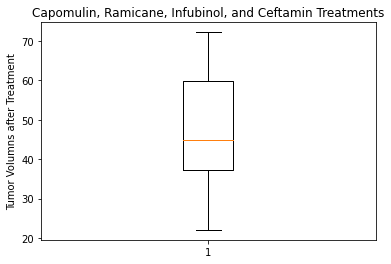

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('Capomulin, Ramicane, Infubinol, and Ceftamin Treatments')
ax1.set_ylabel('Tumor Volumns after Treatment')
ax1.boxplot(tumor_vol)

# Show the chart
plt.show()

## Line and Scatter Plots

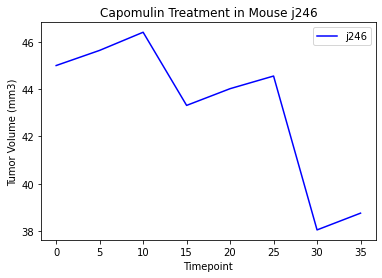

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Pick random mouse treated with Capomulin
cap_mouse = df['Mouse ID'].loc[df['Drug Regimen']=='Capomulin'].sample()
cap_mouse_id = cap_mouse.iloc[0]
# Get data for that mouse.
x_values = df['Timepoint'].loc[df['Mouse ID'].isin(cap_mouse)]
y_values = df['Tumor Volume (mm3)'].loc[df['Mouse ID'].isin(cap_mouse)]

# Plot the data in a line graph
cap_mouse_results, = plt.plot(x_values, y_values, color="blue", label=cap_mouse_id )

# Aesthetics
plt.title(f'Capomulin Treatment in Mouse {cap_mouse_id}')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.legend()

# Show the chart
plt.show()

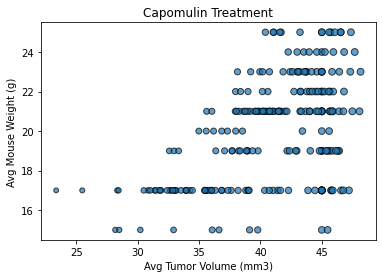

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Set up a dataframe with just Capomulin data and get the mean of each field for each mouse.
cap_df = df.loc[df['Drug Regimen']=='Capomulin']
cap_df.groupby(['Mouse ID']).mean()

avg_tumor_vol = cap_df['Tumor Volume (mm3)']
avg_weight = cap_df['Weight (g)']

plt.scatter(avg_tumor_vol, avg_weight, marker="o", edgecolors="black",
            s=avg_tumor_vol, alpha=0.7)

# Aesthetics
plt.title(f'Capomulin Treatment')
plt.xlabel('Avg Tumor Volume (mm3)')
plt.ylabel('Avg Mouse Weight (g)')

# Show the chart
plt.show()

## Correlation and Regression

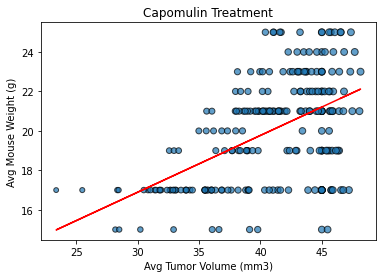

The R^2 value of the regression model is 0.2763600223455911 and therefore the relationship is statistically significant.


In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

reg_slope, reg_int, reg_r, reg_p, reg_std_err = st.linregress(avg_tumor_vol, avg_weight)

regression_line = reg_slope * avg_tumor_vol + reg_int

plt.scatter(avg_tumor_vol, avg_weight, marker="o", edgecolors="black",
            s=avg_tumor_vol, alpha=0.7)
plt.plot(avg_tumor_vol, regression_line, '-r')

# Aesthetics
plt.title(f'Capomulin Treatment')
plt.xlabel('Avg Tumor Volume (mm3)')
plt.ylabel('Avg Mouse Weight (g)')

# Show the chart
plt.show()

if reg_r**2 > .05:
    significant = 'is'
else:
    significant = 'is not'

print(f'The R^2 value of the regression model is {reg_r**2} and therefore the relationship {significant} statistically significant.')